In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import pickle
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [2]:
dataset = pd.read_csv("flightdata.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [4]:
dataset.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [5]:
dataset.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [6]:
dataset['dest'].unique()

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'], dtype=object)

In [7]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(100,257))
plt.show()

<Figure size 7200x18504 with 0 Axes>

In [8]:
def draw_barplot(_style, _x,_y,_dataset,_suptitle,_xLabels,_yLabels):        
            sns.set(style=_style)         
            g = sns.catplot(x=_x, y=_y, data=_dataset,aspect=2,
                            height=5, kind="bar", palette="muted")
            plt.subplots_adjust(top=0.9)
            g.fig.suptitle(_suptitle)
            g.set_xlabels(_xLabels)
            g.set_ylabels(_yLabels) 

In [9]:
def plot_CountPlot(X,Dataframe,Title):
    fig = plt.figure(figsize=(15,5))
    ax = sns.countplot(x=X, data=Dataframe ,palette='pastel' ,edgecolor=sns.color_palette("dark", 10))
    ax.set_title(Title)
    ax.legend(loc='upper right')

    for t in ax.patches:
        if (np.isnan(float(t.get_height()))):
            ax.annotate(0, (t.get_x(), 0))
        else:
            ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    plt.show();   

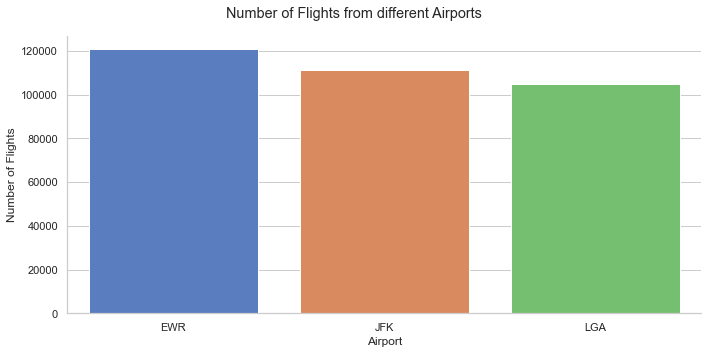

In [10]:
dt=dataset.groupby(by='origin').count().reset_index().sort_values(by='year', ascending=False)
dt['flightsCount']=dt.year

#Call Function to draw Bar Graph
draw_barplot(_style='whitegrid',_x='origin',_y='flightsCount',_xLabels='Airport',
             _yLabels='Number of Flights', _dataset=dt,
             _suptitle="Number of Flights from different Airports"
            )

<AxesSubplot:>

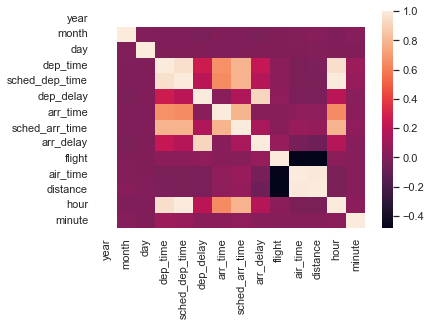

In [11]:
sns.heatmap(dataset.corr())

No handles with labels found to put in legend.


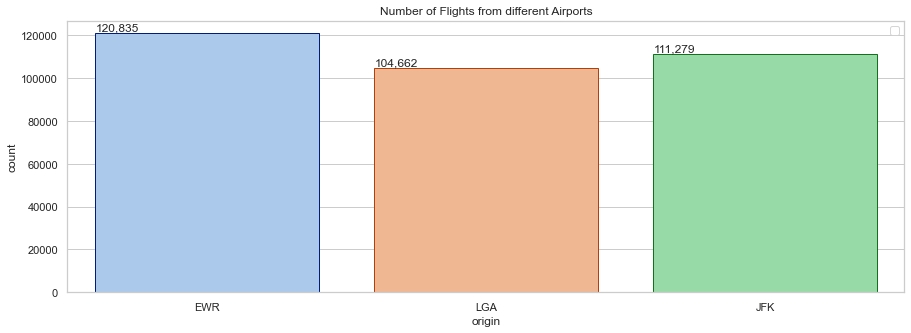

In [12]:
plot_CountPlot('origin',dataset,'Number of Flights from different Airports')

In [13]:
dataset = dataset[["year","month","day","dep_time","sched_dep_time","dep_delay","arr_time","sched_arr_time","arr_delay","flight","air_time","distance","hour","minute"]]
dataset.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
flight               0
air_time          9430
distance             0
hour                 0
minute               0
dtype: int64

In [30]:
dataset= dataset.fillna({'arr_delay' : 1})
dataset= dataset.fillna({'dep_delay' : 0})
dataset.iloc[160:173]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,...,minute_50,minute_51,minute_52,minute_53,minute_54,minute_55,minute_56,minute_57,minute_58,minute_59
160,2013,1,1,856.0,900,-4.0,1222.0,1232,-10.0,2143,...,0,0,0,0,0,0,0,0,0,0
161,2013,1,1,856.0,855,1.0,1140.0,1203,-23.0,1296,...,0,0,0,0,0,1,0,0,0,0
162,2013,1,1,857.0,900,-3.0,1516.0,1530,-14.0,51,...,0,0,0,0,0,0,0,0,0,0
163,2013,1,1,857.0,905,-8.0,1107.0,1120,-13.0,181,...,0,0,0,0,0,0,0,0,0,0
164,2013,1,1,857.0,900,-3.0,1124.0,1133,-9.0,485,...,0,0,0,0,0,0,0,0,0,0
165,2013,1,1,857.0,851,6.0,1157.0,1222,-25.0,1670,...,0,1,0,0,0,0,0,0,0,0
166,2013,1,1,858.0,900,-2.0,1102.0,1110,-8.0,4478,...,0,0,0,0,0,0,0,0,0,0
167,2013,1,1,859.0,900,-1.0,1140.0,1204,-24.0,1885,...,0,0,0,0,0,0,0,0,0,0
168,2013,1,1,859.0,900,-1.0,1223.0,1225,-2.0,407,...,0,0,0,0,0,0,0,0,0,0
169,2013,1,1,900.0,900,0.0,1211.0,1203,8.0,1170,...,0,0,0,0,0,0,0,0,0,0


In [31]:
dataset.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,...,minute_50,minute_51,minute_52,minute_53,minute_54,minute_55,minute_56,minute_57,minute_58,minute_59
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,1545,...,0,0,0,0,0,0,0,0,0,0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,1714,...,0,0,0,0,0,0,0,0,0,0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,1141,...,0,0,0,0,0,0,0,0,0,0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,725,...,0,0,0,0,0,0,0,0,0,0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,461,...,0,0,0,0,0,0,0,0,0,0


In [36]:
import numpy as np 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


In [38]:
dataset= pd.get_dummies(dataset, columns = ['flight','distance'])
dataset.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,air_time,...,distance_2465,distance_2475,distance_2521,distance_2565,distance_2569,distance_2576,distance_2586,distance_3370,distance_4963,distance_4983
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,227.0,...,0,0,0,0,0,0,0,0,0,0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,227.0,...,0,0,0,0,0,0,0,0,0,0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,160.0,...,0,0,0,0,0,0,0,0,0,0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,183.0,...,0,0,0,0,0,0,0,0,0,0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,116.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
x= dataset.iloc[:, 0:8].values
y= dataset.iloc[:, 8:9].values

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_test,y_train = train_test_split(x,y,test_size = 0.2, random_state =0)

In [45]:
x_test.shape

(67356, 8)

In [46]:
x_train.shape

(269420, 8)

In [47]:
y_test.shape

(269420, 1)

In [50]:
y_train.shape

(67356, 1)

In [69]:
import pickle
pickle.dump(classifier,open('flight.pkl','wb'))